In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install pennylane

clear_output()

In [ ]:
from pennylane import numpy as np

In [ ]:
import pennylane as qml

In [ ]:
#I.5.2.
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def fake_z():

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)

    # APPLY RZ (remember to ignore global phase)
    qml.RZ(np.pi, wires = 0)

    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


# Quantum Circuits

In [ ]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])



# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [ ]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################
@qml.qnode(dev)

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


# We can execute the QNode by calling it like we would a regular fuction
my_circuit(theta, phi, omega)




tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


# Unitary Matrices

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT


    # Use QuantumUnitary to apply U to the Qubit
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()


In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()

In [ ]:
# create a quantum device
dev = qml.device("default.qubit", wires=1)

# Create a Hadamard Gate
# U = np.array([[1, 1], [1, -1]]) / qml.numpy.sqrt(2)
# OR
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    #a quantum node

    if (state == 1):
        # setting intial state of qubit 0 as |1>
        qml.PauliX(wires=0)

    # Applying Unitary Operation U on qubit 0/ wire 0
    qml.QubitUnitary(U, wires = 0)

    #return the final state
    return qml.state()

In [ ]:
# Create a Quantum Device
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    # A Quantum Node

    # Applying Hadamard Gate on Qubit 0
    qml.Hadamard(wires=0)

    # Returning the final state
    return qml.state()

In [ ]:
# Create a Quantum Device
device = qml.device('default.qubit', wires = 1)

@qml.qnode(device)
def apply_hadamard_to_state(state):
    # A Quantum Node

    if(state == 1):
        # Setting initial state of qubit 0 as |1>
        qml.PauliX(wires=0)

    # Applying Hadamard Gate to Qubit 0
    qml.Hadamard(wires=0)

    # printing final state
    return qml.state()

print(apply_hadamard_to_state(0));
print(apply_hadamard_to_state(1));

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


In [ ]:
# Creating Quantum Device
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hxh(state):
    # A Quantum Node

    if(state == 1):
        # Setting intial state of qubit 0 as |1>
        qml.PauliX(wires=0)

    # Applying |q> --- H -- X -- H ---
    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)

    # Returning final state
    return qml.state()

print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)

    # APPLY PAULI Z
    qml.PauliZ(wires = 0)

    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


In [ ]:
#I.5.2.
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def fake_z():

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)

    # APPLY RZ (remember to ignore global phase)
    qml.RZ(np.pi, wires = 0)

    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT

    # RETURN THE STATE
    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires = 0)
    qml.S(wires = 0)
    qml.adjoint(qml.T)(wires = 0)
    qml.RZ(0.3, wires = 0)
    qml.adjoint(qml.S)(wires = 0)

    # RETURN THE STATE
    return qml.state()


In [ ]:
#I.6.1.
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires = 0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires = 0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

#plot = plotter(angles, output_states)


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


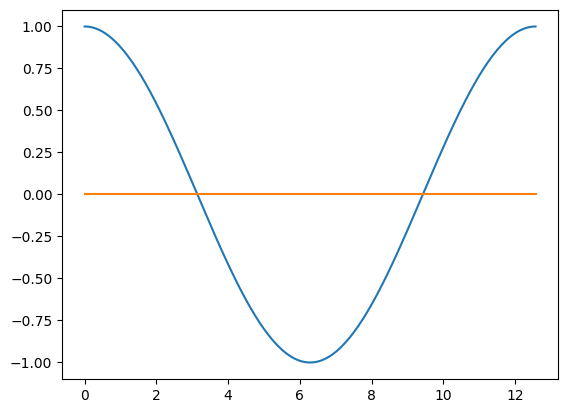

In [ ]:
plt.plot(angles,output_states)

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    qml.RY(theta, wires = 0)
    return qml.state()

    return

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

#plot = plotter(angles, output_states)

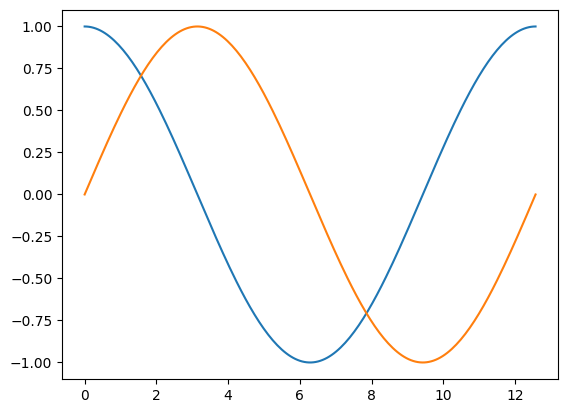

In [ ]:
plt.plot(angles,output_states)